# Assignment 2

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning sessions. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Import specific objects
from sklearn.preprocessing import StandardScaler
from ISLP import load_data

### Question 1: Classification using KNN

We'll now use the `Caravan` dataset from the `ISLP` package. (You may use `Caravan.describe()` to review details of the dataset.) In this dataset, the response variable of interest is `Purchase`, which indicates if a given customer purchased a caravan insurance policy. We will simultaneously use all other variables in the dataset to predict the response variable.

In [16]:
# Load the "Caravan" dataset using the "load_data" function from the ISLP package
Caravan = load_data('Caravan')

# Add your code here
Caravan.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.076606,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.377569,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,8.000000,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000


In [17]:
Caravan


,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,1,1,2,8,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,No
5818,35,1,4,4,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
5819,33,1,3,4,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,Yes
5820,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,No


Before fitting any model, it is essential to understand our data. Answer the following questions about the `Caravan` dataset (Hint: use `print` and `describe`):<br><br>
**My Answers**<br><br>
_(i)_ How many observations (rows) does the dataset contain?<br>
**A:** 5822 rows.


_(ii)_ How many variables (columns) does the dataset contain?<br>
**A:** 86 columns.

_(iii)_ What 'variable' type is the response variable `Purchase` (e.g., 'character', 'factor', 'numeric', etc)? What are the 'levels' of the variable?<br>
**A:** It's a field containing the categorical values and typically represent whether a caravan policy was purchased or not. The two levels are:<br>
* **No** - indicating that no caravan policy was purchased.
* **Yes** - indicating that a caravan policy was purchased.

_(iv)_ How many predictor variables do we have (Hint: all variables other than `Purchase`)?<br>
**A:** 85 predictor variables (just subtracted the Purchase from the total columns).


In [18]:
# Add your code here
# (i)
print(len(Caravan))

# (ii)
print(Caravan.shape)

# (iii)
print(set(Caravan['Purchase']))

# (iv)
Predictors_count = Caravan.drop(columns=['Purchase'])
print(Predictors_count.shape)


5822
(5822, 86)
{'No', 'Yes'}
(5822, 85)


Next, we must preform 'pre-processing' or 'data munging', to prepare our data for classification/prediction. For KNN, there are three essential steps. A first essential step is to 'standardize' the predictor variables. We can achieve this using the `scaler` method, provided as follows:

In [61]:
# Select predictors (excluding the 86th column)
predictors = Caravan.iloc[:, :-1]

# Standardize the predictors
scaler = StandardScaler()
predictors_standardized = pd.DataFrame(scaler.fit_transform(predictors), columns=predictors.columns)

# Display the head of the standardized predictors
print(predictors_standardized.head())

    MOSTYPE  MAANTHUI   MGEMOMV  MGEMLEEF  MOSHOOFD    MGODRK    MGODPR  \
0  0.680906  -0.27258  0.406697 -1.216964  0.779405 -0.694311  0.217444   
1  0.992297  -0.27258 -0.859500 -1.216964  0.779405  0.302552 -0.365410   
2  0.992297  -0.27258 -0.859500 -1.216964  0.779405 -0.694311 -0.365410   
3 -1.187437  -0.27258  0.406697  0.010755 -0.970980  1.299414 -0.948264   
4  1.225840  -0.27258  1.672893 -1.216964  1.479559  0.302552 -0.365410   

     MGODOV    MGODGE    MRELGE  ...   ALEVEN  APERSONG   AGEZONG  AWAOREG  \
0 -0.068711 -0.161816  0.427670  ... -0.20291 -0.073165 -0.081055 -0.05992   
1 -0.068711  0.464159 -0.096077  ... -0.20291 -0.073165 -0.081055 -0.05992   
2  0.914172  0.464159 -1.667319  ... -0.20291 -0.073165 -0.081055 -0.05992   
3  0.914172  0.464159 -0.619824  ... -0.20291 -0.073165 -0.081055 -0.05992   
4 -0.068711  0.464159  0.427670  ... -0.20291 -0.073165 -0.081055 -0.05992   

     ABRAND   AZEILPL  APLEZIER   AFIETS   AINBOED  ABYSTAND  
0  0.764971 -0.02

_(v)_ Why is it important to standardize the predictor variables?<br>
**A:** Brings equal weighting ($\mu$==0 and std dev==1), faster model training (improved convergence).

_(vi)_ Why did we elect not to standard our response variable `Purchase`?  
**A:** `Purchase`is a categorical variable. If Standardizing it, it would become a continous variable, thus losing the categorical information and the model might fail on predictions.

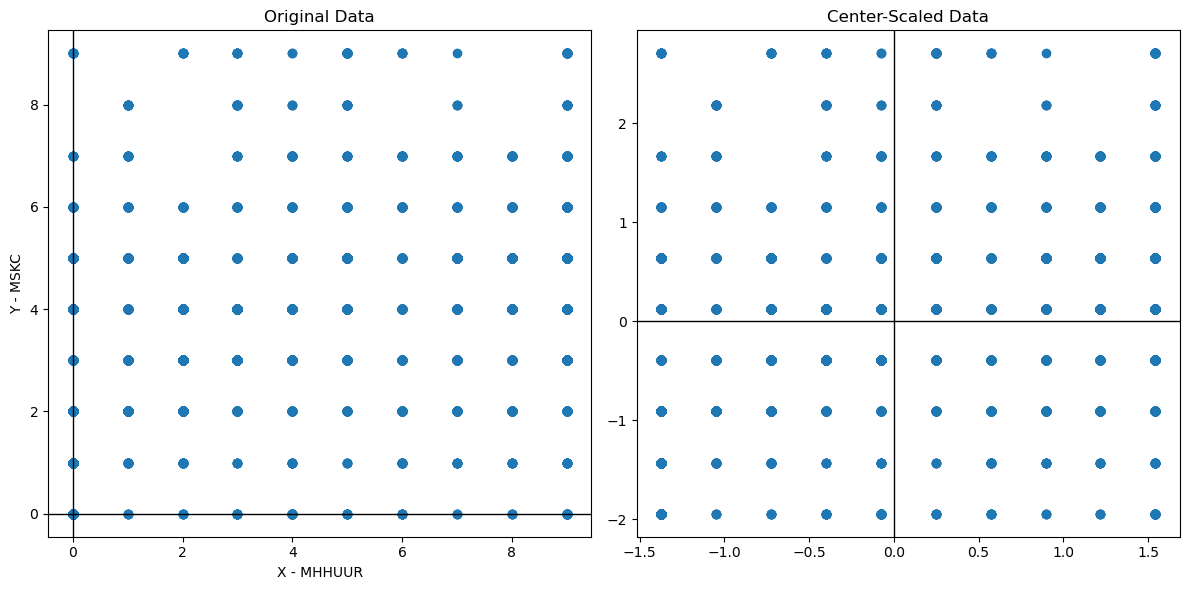

In [60]:
# Your answer here
#Visual analysis of the data without scalling and with scalling

# Select predictors (excluding the 86th column)
predictors = Caravan.iloc[:, :-1]

#FIELD1 = 'MGODPR'
#FIELD2 = 'MRELGE'

#FIELD1 = 'MFGEKIND'
#FIELD2 = 'MFWEKIND'

FIELD1 = 'MHHUUR'
FIELD2 = 'MSKC'

# Scaling the predictors
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(predictors), columns=predictors.columns) # Scaling the data (u==0, std dev==1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First scatter plot
ax1.scatter(predictors[FIELD1], predictors[FIELD2]) # Just two random columns for scalling visualization
ax1.axhline(y=0, color='black', linewidth=1)  # Draw horizontal axis line at y=0
ax1.axvline(x=0, color='black', linewidth=1)  # Draw vertical axis line at x=0
#ax1.set_xlabel('X - ' + FIELD1)
#ax1.set_ylabel('Y - ' + FIELD2)
ax1.set_title('Original Data')

# Second scatter plot (scaled)
ax2.scatter(df_scaled[FIELD1], df_scaled[FIELD2])
ax2.axhline(y=0, color='black', linewidth=1)  # Draw horizontal axis line at y=0
ax2.axvline(x=0, color='black', linewidth=1)  # Draw vertical axis line at x=0
ax1.set_xlabel('X - ' + FIELD1)
ax1.set_ylabel('Y - ' + FIELD2)
ax2.set_title('Center-Scaled Data')

plt.tight_layout()
plt.show()


_(vii)_ A second essential step is to set a random seed. Do so below (Hint: use the `random.seed` function). Why is setting a seed important? Is the particular seed value important? Why or why not?<br>

**A:** The random.seed is important to guarantee two main aspects:<br>

*Reproducibility<br>
*Consistency

In [64]:
# Add your code here
import random

# Set a seed
random.seed(123)

# Generate a sequence of random numbers
print(random.random())  # Output: 0.052363598850944326
print(random.random())  # Output: 0.08718667752263232

# Reset the seed
random.seed(123)

# Generate the sequence again
print(random.random())  # Output: 0.052363598850944326
print(random.random())  # Output: 0.08718667752263232

0.052363598850944326
0.08718667752263232
0.052363598850944326
0.08718667752263232


_(viii)_ A third essential step is to split our standardized data into separate training and testing sets. We will split into 75% training and 25% testing. The provided code randomly partitions our data, and creates linked training sets for the predictors and response variables. Extend the code to create a non-overlapping test set for the predictors and response variables.

In [ ]:
# Create a random vector of True and False values
split = np.random.choice([True, False], size=len(predictors_standardized), replace=True, p=[0.75, 0.25])

# Define the training set for X (predictors)
training_X = predictors_standardized[split]

# Define the training set for Y (response)
training_Y = Caravan.loc[split, 'Purchase']

# Define the testing set for X (predictors)
testing_X = predictors_standardized[~split]

# Define the testing set for Y (response)
testing_Y = Caravan.loc[~split, 'Purchase']


_(ix)_ We are finally set to fit the KNN model. In Python, we can use the `KNeighborsClassifier()` function. Fit the KNN with k=1. (You may review arguments to knn by typing `help(knn.fit)`). 

In [ ]:
# Add your code here

Using your fit model, answer the following questions:   
_(x)_ What is the prediction accuracy? (Hint: use the `score` method, and compare your model to `testing_Y`)  
_(xi)_ What is the predictor error ? (Hint: compute it from the accuracy)

In [ ]:
# prediction accuracy rate

In [ ]:
# prediction error rate

_(xii)_ How does this prediction error/accuracy compare to what could be achieved via random guesses? To answer this, consider the percent of customers in the `Caravan` dataset who actually purchase insurance, computed below:

In [ ]:
# Calculate the percentage of customers who purchase insurance
percentage_purchase = (Caravan['Purchase'].eq('Yes').sum() / Caravan['Purchase'].eq('No').sum()) * 100

print(percentage_purchase)

_(xiii)_ Fit a second KNN model, with $K=3$. Does this model perform better (i.e., have higher accuracy, compared to a random guess)?

In [ ]:
# Your code here

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Classification using KNN|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-2`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_2.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applied_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
